In [1]:
from scipy import stats
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nycdata = pd.read_csv('nyc311data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nycdata.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
nycdata['Created Date'] = pd.to_datetime(nycdata['Created Date'])

In [5]:
nycdata['Closed Date'] = pd.to_datetime(nycdata['Closed Date'])

In [6]:
#so many null values in closed date column
nycdata['Closed Date'].isnull().sum()

2164

In [7]:
nycdata['Request_Closing_Time'] = nycdata['Closed Date'] - nycdata['Created Date']

In [8]:
nycdata.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [9]:
cols = list(nycdata.columns)
cols.insert(3, 'Request_Closing_Time')
cols.pop()
nycdata_new = nycdata.reindex(columns = cols)

In [10]:
nycdata_new.head()

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,01:26:16,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,04:51:31,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,07:45:14,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,03:27:02,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [11]:
cols

['Unique Key',
 'Created Date',
 'Closed Date',
 'Request_Closing_Time',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Term

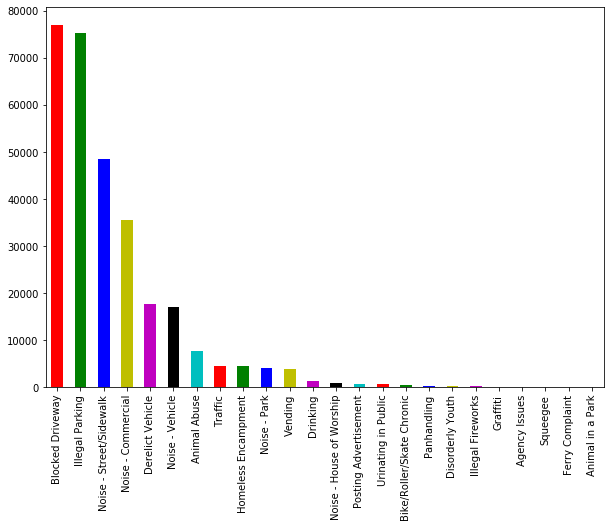

In [12]:
#insight 1 : complaint type and freequency
complaint_freequency = nycdata_new['Complaint Type'].value_counts()
figsize = plt.figure(figsize = (10,7))
complaint_freequency.plot(kind ='bar', color = list('rgbymkc'))
plt.show()

### From chart we can see that more complaints are fall into category Blocked driveway followed by illegal parking. we can see that most of complaints come from traffic category.

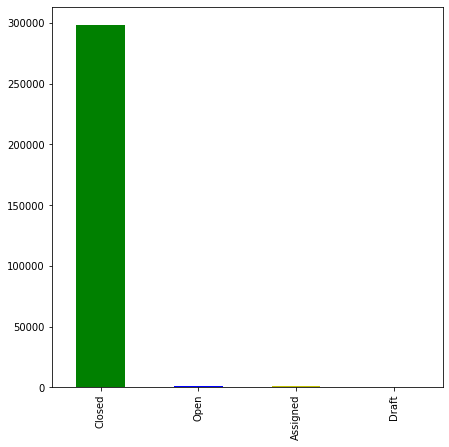

In [13]:
#insight 2 status of complaints registered
complaint_status = nycdata_new['Status'].value_counts()
figsize = plt.figure(figsize = (7,7))
complaint_status.plot(kind ='bar', color = list('gbyr'))
plt.show()

### The graph shows that most of the complaints are closed.very few are pending.The authorities are doing a great job.

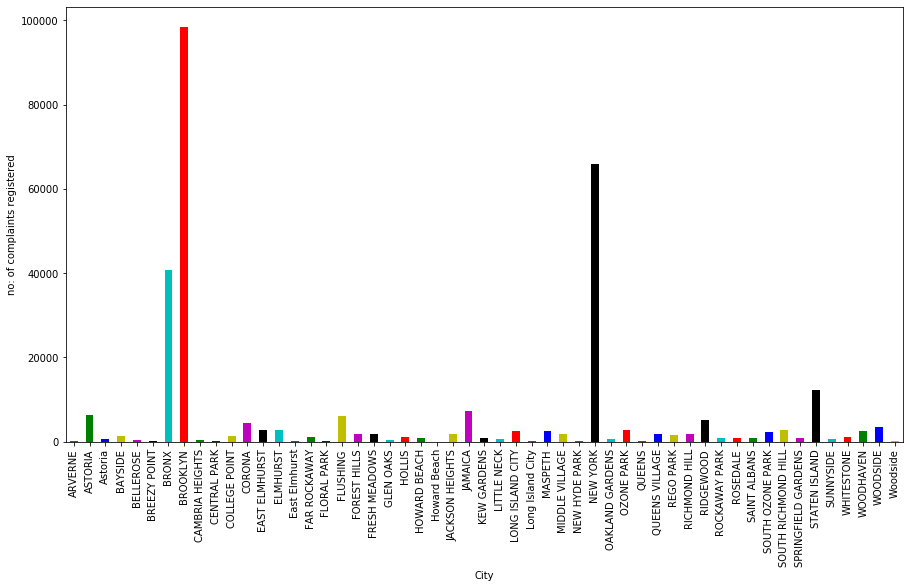

In [14]:
#insight 3 complaint and cities
nyc_grouped = nycdata_new.groupby('City')
figsize = plt.figure(figsize = (15,8))
nyc_grouped['Complaint Type'].count().plot(kind = 'bar',color = list('rgbymkc'))
plt.ylabel('no: of complaints registered')
plt.show()

### Most of the complaints are from Brooklyn, then from New York, then from bronx. Relative less complaints registered from other cities.

In [15]:
#insight 4 complaint types and location type : Table format
nyc_grouped_type = nycdata_new.groupby('Location Type')
figsize = plt.figure(figsize = (15,8))
df_complaint_type_loc_type =pd.DataFrame(nyc_grouped_type['Complaint Type'].max())
df_complaint_type_loc_type


,Complaint Type
Location Type,
Bridge,Homeless Encampment
Club/Bar/Restaurant,Urinating in Public
Commercial,Animal Abuse
Ferry,Ferry Complaint
Highway,Traffic
House and Store,Animal Abuse
House of Worship,Noise - House of Worship
Park,Animal in a Park
Park/Playground,Vending


<Figure size 1080x576 with 0 Axes>

### The above Table  shows the max occured complaint types for each location types.it is interesting to go through the table.

## 4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [16]:
nycdata_new['Request_Closing_Time'] = abs(nycdata_new['Request_Closing_Time'].values.astype(np.float64))

In [17]:
nycdata_grouped = nycdata_new.groupby(['Complaint Type', 'City'])
new_df = pd.DataFrame(pd.to_timedelta(nycdata_grouped['Request_Closing_Time'].mean()), index = None)

In [18]:
new_df.head()

Request_Closing_Time
Complaint Type City                             
Animal Abuse   ARVERNE           02:09:13.052631
               ASTORIA           05:00:00.608000
               BAYSIDE           03:16:28.243243
               BELLEROSE         12:43:28.857142
               BREEZY POINT      02:36:48.500000

In [19]:
new_df.reset_index(level=[0,1], inplace=True)

In [20]:
new_df.columns

Index(['Complaint Type', 'City', 'Request_Closing_Time'], dtype='object')

In [21]:
new_df.pivot(index = 'Complaint Type', columns = 'City', values = 'Request_Closing_Time')

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,02:09:13.052631,05:00:00.608000,NaT,03:16:28.243243,0 days 12:43:28.857142,02:36:48.500000,0 days 07:20:07.780212,0 days 04:49:57.021720,11:21:21,NaT,...,07:22:18.300000,03:29:32.418181,0 days 04:22:03.730769,14:51:43.333333,0 days 04:58:10.220825,11:33:10.457142,02:48:28.428571,0 days 04:58:03.066666,08:26:21.492753,NaT
Animal in a Park,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Bike/Roller/Skate Chronic,NaT,01:44:21.533333,NaT,NaT,0 days 04:54:00,NaT,0 days 03:27:32.300000,0 days 05:00:16.936936,NaT,NaT,...,NaT,04:03:18,1 days 06:54:37,NaT,0 days 04:04:38.571428,01:12:17.500000,03:08:40.250000,0 days 01:14:30,12:08:55.500000,NaT
Blocked Driveway,02:31:33.485714,04:48:58.024064,0 days 04:54:52.663793,02:33:47.058355,0 days 10:05:57.884210,01:19:39.666666,8 days 15:07:38.735700,3 days 23:25:52.409402,07:41:45.523809,NaT,...,04:41:12.434426,04:25:39.359872,0 days 04:51:58.768087,09:02:09.141221,0 days 04:04:16.513071,06:58:06.184466,03:09:11.370192,100 days 22:32:38.284768,06:28:23.840669,06:24:22.363636
Derelict Vehicle,02:58:05.592592,09:41:21.299145,0 days 06:14:10.166666,03:21:35.207070,0 days 17:10:05.314606,07:08:42.666666,55 days 01:04:30.991221,41 days 10:57:42.854991,16:06:38.800000,NaT,...,05:54:01.772277,10:23:54.678770,0 days 11:52:36.816608,11:40:11.680952,0 days 05:02:22.480181,09:49:39.100000,03:24:51.634361,0 days 07:27:00.334415,09:23:02.129554,04:58:00
Disorderly Youth,03:35:28.500000,02:54:09.333333,NaT,02:58:23,0 days 01:51:00,NaT,0 days 04:14:18.269841,0 days 04:09:01.861111,NaT,NaT,...,01:45:33,02:40:56,0 days 03:03:54,NaT,0 days 03:53:36.652173,03:44:25.500000,03:15:58,NaT,01:13:00,NaT
Drinking,00:14:19,04:43:20.714285,NaT,01:54:00,0 days 03:55:05,02:38:00,0 days 05:47:36.893617,0 days 03:32:26.019455,NaT,NaT,...,00:57:41,04:52:52.307692,0 days 05:46:00.043478,04:50:41.666666,0 days 03:29:35.394285,04:36:21.400000,03:37:45.500000,0 days 02:51:58.666666,05:28:52.133333,NaT
Graffiti,01:32:00,14:05:42.250000,NaT,04:33:05.666666,NaT,NaT,0 days 08:53:56.555555,0 days 08:14:35.534883,NaT,NaT,...,NaT,NaT,NaT,NaT,0 days 09:33:44.500000,00:35:33,08:48:00,NaT,08:59:45.666666,NaT
Homeless Encampment,01:48:53.250000,04:55:03.312500,NaT,02:52:32,1 days 15:08:00,NaT,0 days 07:26:30.842105,0 days 04:41:41.351225,22:47:22,NaT,...,07:34:14.500000,01:50:12.750000,0 days 05:20:07.818181,03:46:47,0 days 04:58:46.957746,07:11:22.454545,NaT,0 days 07:06:24.555555,06:43:01.848484,NaT


## 5.Perform a statistical test for the following:
### a. Whether the average response time across complaint types is similar or not (overall)
### b. Are the type of complaint or service requested and location related?

In [232]:
#a.Whether the average response time across complaint types is similar or not (overall)
# H0 average response time across complaint types is similar
# H1 average response time across complaint types is Not similar

In [22]:
top_comp = nycdata['Complaint Type'].value_counts()[:5]
top_comp

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [23]:
test1_data = nycdata_new.loc[nycdata['Complaint Type'].isin(top_comp.index), ['Complaint Type', 'Request_Closing_Time']]

In [24]:
test1_data.dropna(how = 'any', inplace =True)
test1_data.isnull().sum()

Complaint Type          0
Request_Closing_Time    0
dtype: int64

In [303]:
#test1_data['Request_Closing_Time'] = abs(test1_data['Request_Closing_Time'].values.astype(np.float64))

In [25]:
complaint1 = test1_data[test1_data['Complaint Type'] == top_comp.index[0]].Request_Closing_Time
complaint1.head()

1     5.176000e+12
2     1.749100e+13
7     6.475000e+12
9     4.982000e+12
10    2.808200e+13
Name: Request_Closing_Time, dtype: float64

In [26]:
complaint2 = test1_data[test1_data['Complaint Type'] == top_comp.index[1]].Request_Closing_Time
complaint2.head()

3    2.791400e+13
4    1.242200e+13
5    6.810000e+12
6    7.048000e+12
8    3.078200e+13
Name: Request_Closing_Time, dtype: float64

In [27]:
complaint3 = test1_data[test1_data['Complaint Type'] == top_comp.index[2]].Request_Closing_Time
complaint3.head()

0     3.315000e+12
12    8.937000e+12
19    2.825000e+12
38    1.768000e+12
54    5.384000e+12
Name: Request_Closing_Time, dtype: float64

In [28]:
complaint4 = test1_data[test1_data['Complaint Type'] == top_comp.index[3]].Request_Closing_Time
complaint4.head()

17    3.068000e+12
18    1.056100e+13
22    4.542000e+12
29    8.999000e+12
30    7.149000e+12
Name: Request_Closing_Time, dtype: float64

In [29]:
complaint5 = test1_data[test1_data['Complaint Type'] == top_comp.index[4]].Request_Closing_Time
complaint5.head()

14     3.776300e+13
151    1.422100e+13
255    4.913000e+12
256    1.487900e+13
295    2.712000e+12
Name: Request_Closing_Time, dtype: float64

In [30]:
#oneway anova test
stats.f_oneway(complaint1, complaint2, complaint3, complaint4, complaint5)

F_onewayResult(statistic=96.1534370677002, pvalue=6.774428063522897e-82)

## Inference : since P-value less than 0.05 we can reject Null Hypothesis. The response time for different complaint types are different

# Hypothesis test2

In [31]:
# b. Are the type of complaint or service requested and location related?
# H0 : The type of complaint or service requested and location are Not related
# H1 :  The type of complaint or service requested and location are  related

In [32]:
top_complaints = nycdata_new['Complaint Type'].value_counts()[:5].index

In [33]:
test2_data = nycdata_new.loc[nycdata_new['Complaint Type'].isin(top_complaints), [ 'Complaint Type', 'City']]

In [34]:
test2_data.isnull().sum()

Complaint Type       0
City              2486
dtype: int64

In [35]:
test2_data.dropna(inplace =True)

In [36]:
test2_data.isnull().sum()

Complaint Type    0
City              0
dtype: int64

In [37]:
test2_data.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [38]:
crosstabed_data = pd.crosstab(test2_data['Complaint Type'], test2_data['City'])

In [39]:
crosstabed_data

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,...,244,942,1548,262,2142,206,208,1060,1613,11
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,...,202,358,289,210,1766,10,227,308,247,2
Illegal Parking,58,1068,213,514,106,15,7859,27462,76,2,...,181,494,462,238,4886,122,525,682,891,100
Noise - Commercial,2,1293,262,40,37,4,2434,11463,12,0,...,29,70,198,36,678,161,16,175,209,2
Noise - Street/Sidewalk,29,386,114,15,13,1,8892,13356,25,95,...,79,105,91,38,819,65,33,86,250,5


In [40]:
chisq, p, dof, exp = stats.chi2_contingency(crosstabed_data)

In [41]:
print('p value : ', p)

p value :  0.0


## A low p value shows the values are not independent.So the types of complaint and locations are dependent.